In [3]:
%matplotlib inline
%load_ext autoreload
import numpy as np
from scipy.misc import imread, imresize
from scipy.io import loadmat
import pickle
from lasagne.objectives import squared_error
from utils import collect_data, load_data, plot_img_dep, rmse, norm, plot_est
import matplotlib.pyplot as plt
import os
rsn = np.random.seed(seed=113)

dmax = 81.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Make3d Dataset2

http://make3d.cs.cornell.edu/data.html

- total of 425 image+depthmap pairs
- 3-d laser scanner (SICK LMS-291)
- image resolution of 1704x2272 
- depthmap resolution of 86x107.  
- 75% used as training 

# Setup
I set up my images from dataset2 in the following way:
- The variable from above, volume_path is the name of the directory that holds subdirectories, "train" and "test". Both "train" and "test contain subdirectories named "small_images" and "depthmaps". Small images is the original images, rotated to match the depthmaps and shrunk using the scripts resize.sh and rotate.sh

ending loss 0.01103639043867588


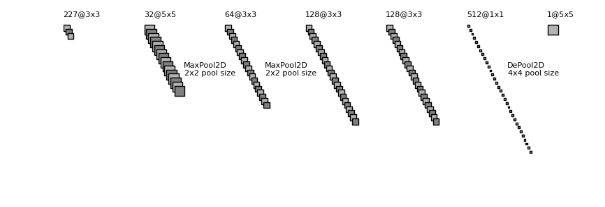

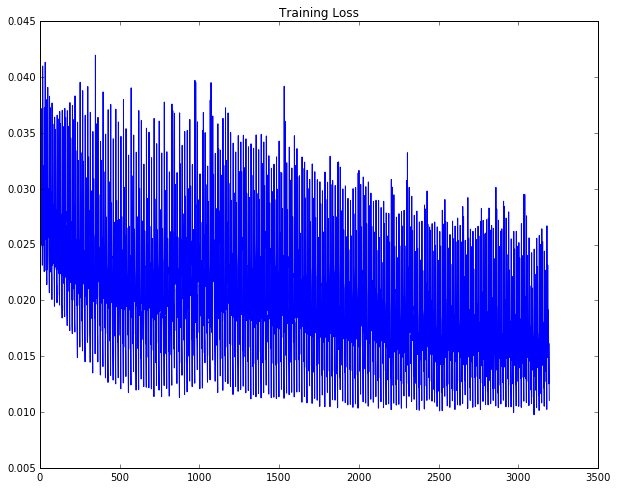

In [14]:
# Load my model - trained to 200 epochs using minibatches of 20 images each
minibatchsize = 20
epochn = 200
network_fname = 'trained/pda_e%s.pkl'%epochn
cnet = imread('convnet_fig.png')
plt.figure(frameon=False,figsize=(10,8))
p = plt.imshow(cnet)
plt.axis('off')
# load a pickled network
lp = pickle.load(open(network_fname, mode='rb'))
train_function = lp['train_function']
predict_function = lp['predict_function']
valid_function = lp['valid_function']
tl = lp['train_losses'][minibatchsize:minibatchsize*epochn]
print('ending loss', tl[-1])
plt.figure(frameon=False, figsize=(10,8))
plt.title("Training Loss")
plt.plot(tl)

In [12]:
# load data
volume_path = '../data/test/'
images, dmaps = collect_data(volume_path)
X_test, y_test = load_data(images, dmaps)

Searching for images in path: ../data/test/small_images/*.jpg
Searching for depthmaps in path: ../data/test/depthmaps/*.mat
FOUND 100 matching images and depths
loading 100 images and depthmaps


Image: 37 RMSE: 0.176393829731


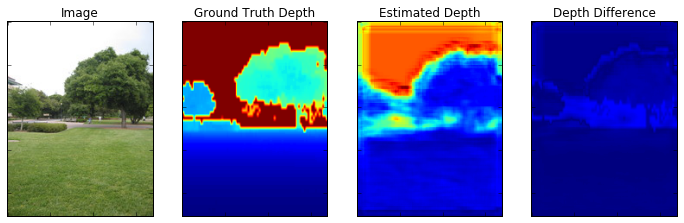

Image: 92 RMSE: 0.152214867955


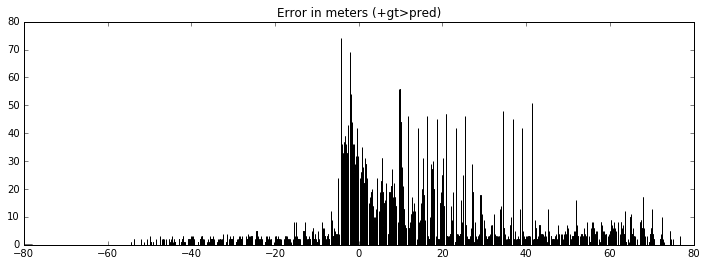

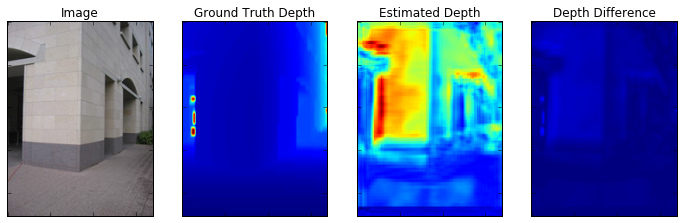

Image: 34 RMSE: 0.175560867778


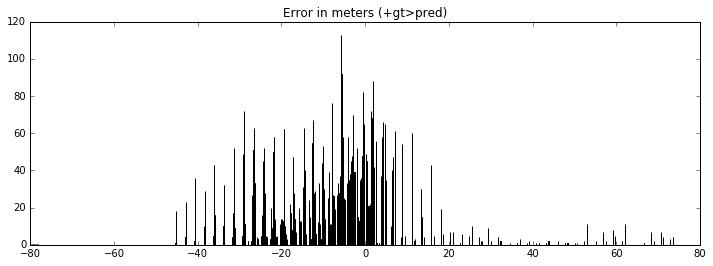

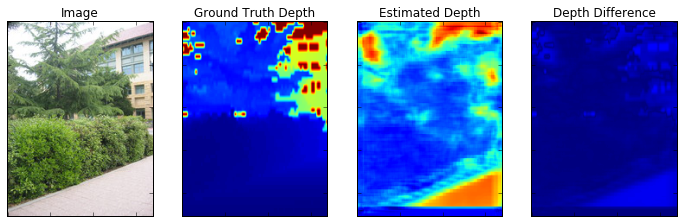

Image: 74 RMSE: 0.105418485726


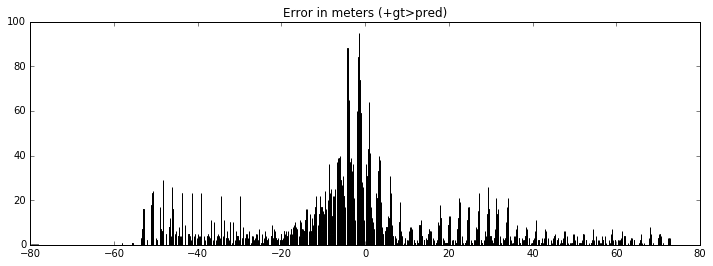

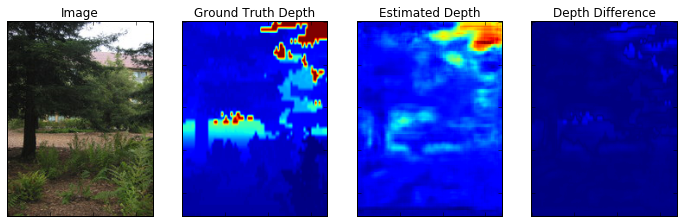

Image: 2 RMSE: 0.191390038947


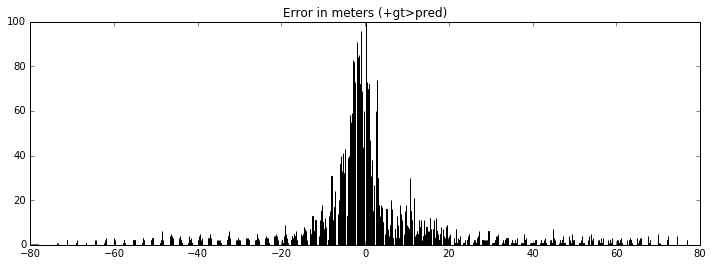

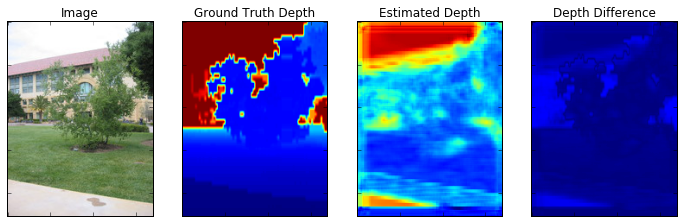

Average Error: 0.160195618027


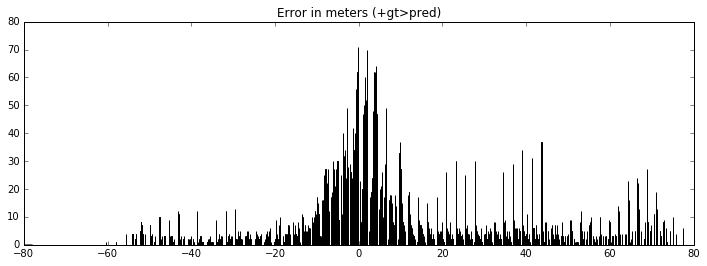

In [13]:
##### randomly select some test images
num_test_imgs = 5
img_ind = np.random.randint(0, len(images), size=num_test_imgs)
arms = 0
for inum in img_ind:
    test = X_test[inum,:,:,:]
    test_img_input = test[None,:,:,:]
    test_img = test.transpose(1,2,0)
    dpredict = predict_function(test_img_input)
    
    dgt = y_test[inum,0,:,:]
    dout = dpredict[0,0,:,:]
    depdif = abs(dout-dgt)
    err = np.exp(dout) - np.exp(dgt) 
    r = rmse(dgt,dout)
    arms += r
    titl = "Image: %s RMSE: %s" %(inum,r)
    print(titl)
    plot_img_dep(test_img, dgt, dout, depdif, titl)
    plt.figure(figsize=(12,4))
    dgtr = ((np.exp(dgt)-1))*dmax
    doutr = ((np.exp(dout)-1))*dmax
    plt.title("Error in meters (+gt>pred)")
    h,bins,patch = plt.hist(dgtr-doutr, bins=70, range=(-80,80))
arms = arms/float(num_test_imgs)
print("Average Error: %s" %arms)